# **Project Title: Customer Churn prediction Using Service And Demographic Data**



Mentor: Pranav Pant

Group Members:



1. Aakash Ponnuru (B23PH1015)
2. Dikshant Jha   (B23ES1014)
3. Rudra Shah     (B23ME1057)
4. Tashir Ahmed   (B23ME1074)



# DATA PREPROCESSING




Importing the Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


Displaying first few rows

In [ ]:
df = pd.DataFrame(df)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Refining Binary Columns

In [ ]:
df.drop(columns = ['customerID'],inplace=True)

In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.9,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.6,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.2,Yes


In [ ]:
df.shape

(7043, 20)

# EDA

<ipython-input-10-d6ab7bc0986c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette="Set2")


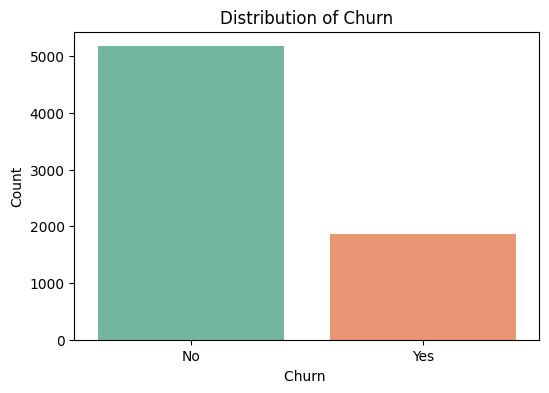

Churn Rate: 
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette="Set2")
plt.title('Distribution of Churn')
plt.xlabel('Churn ')
plt.ylabel('Count')
plt.show()

churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f'Churn Rate: \n{churn_rate}')

In [ ]:
!pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",

    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()



*   26.6 % of customers switched to another firm
*  Customers are 49.5 % female and 50.5 % male.


In [ ]:
import plotly.express as px
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customers with One Year Contract and 3% with Two Year Contract

In [ ]:
import plotly.graph_objects as go


labels = ["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"]
values = df['PaymentMethod'].value_counts()

colors = ['#FFA07A', '#20B2AA', '#778899', '#FF6347']

fig = go.Figure(data=[go.Bar(
    x=labels,
    y=values,
    marker_color=colors,
    text=values,
    textposition='auto'
)])

fig.update_layout(
    title_text="<b>Payment Method Distribution</b>",
    xaxis_title="Payment Method",
    yaxis_title="Count",
    showlegend=False
)

fig.show()



In [ ]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

1. Major customers who moved out were having Electronic Check as Payment Method.
2. Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.



In [ ]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:

fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()



*   A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
*   Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.



In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers without dependents are more likely to churn

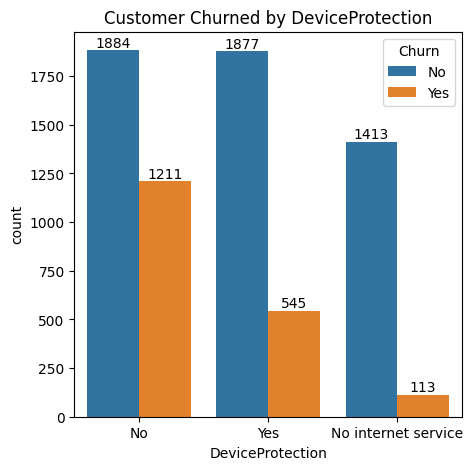

In [ ]:
plt.figure(figsize= (5,5))
plt.title('Customer Churned by DeviceProtection')
ax = sns.countplot(x = 'DeviceProtection',data = df, hue= 'Churn' )
for container in ax.containers:
    ax.bar_label(container)
plt.show()

No divice Protection have high risk to churnout

In [ ]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers with no TechSupport are most likely to migrate to another service provider.

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

<ipython-input-21-9321107cf963>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-21-9321107cf963>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




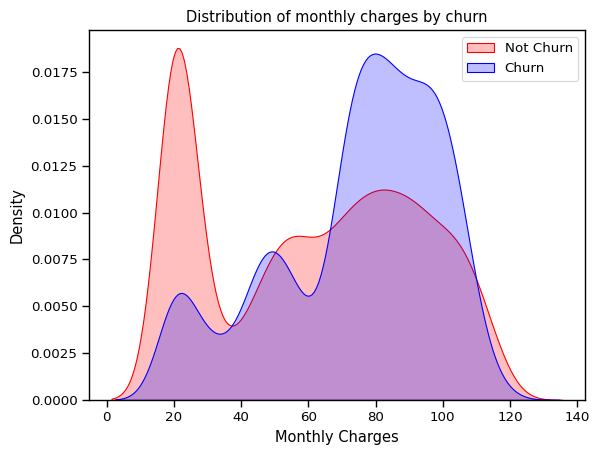

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');


Customers with higher Monthly Charges are also more likely to churn

<ipython-input-22-5df327648a58>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-22-5df327648a58>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




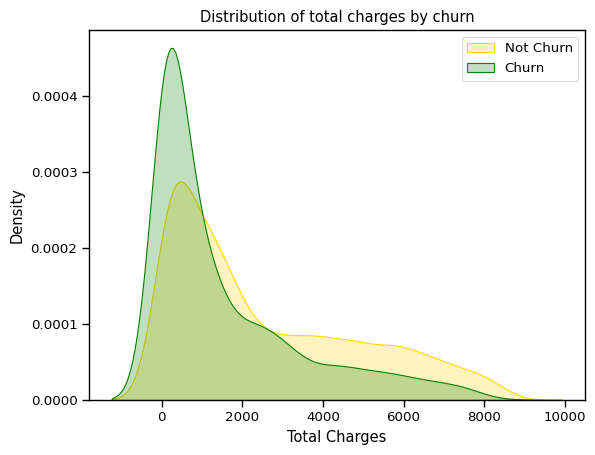

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df = df.dropna(subset=['TotalCharges'])

sns.set_context("paper", font_scale=1.1)

ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No')],
                color="Gold", shade=True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes')],
                ax=ax, color="Green", shade=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

plt.show()

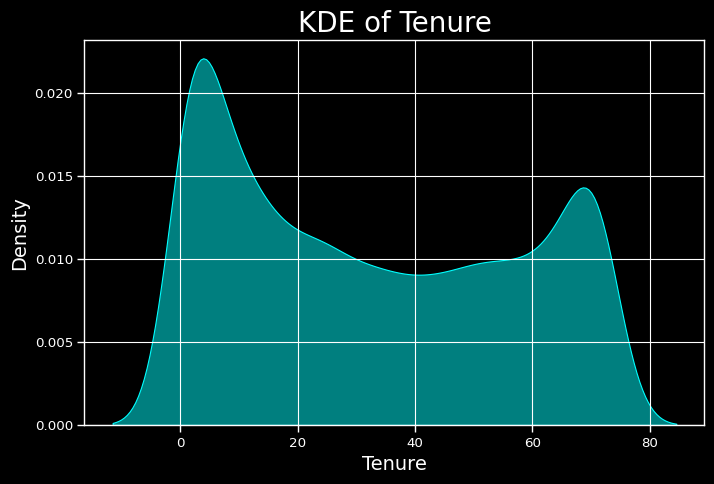

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(8, 5))
sns.kdeplot(df['tenure'], color='cyan', fill=True, alpha=0.5)
plt.title('KDE of Tenure', fontsize=20)
plt.xlabel('Tenure', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.show()

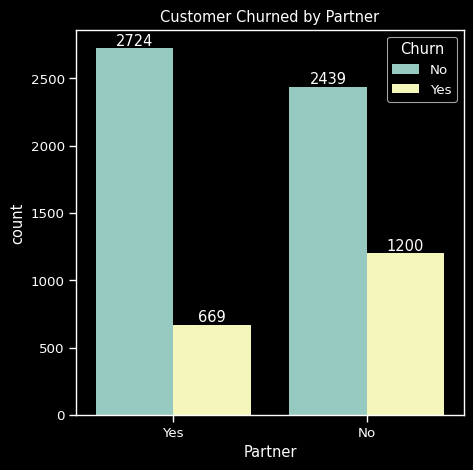

In [ ]:
plt.figure(figsize= (5,5))
plt.title('Customer Churned by Partner')
ax = sns.countplot(x = 'Partner',data = df, hue= 'Churn' )
for container in ax.containers:
    ax.bar_label(container)
plt.show()

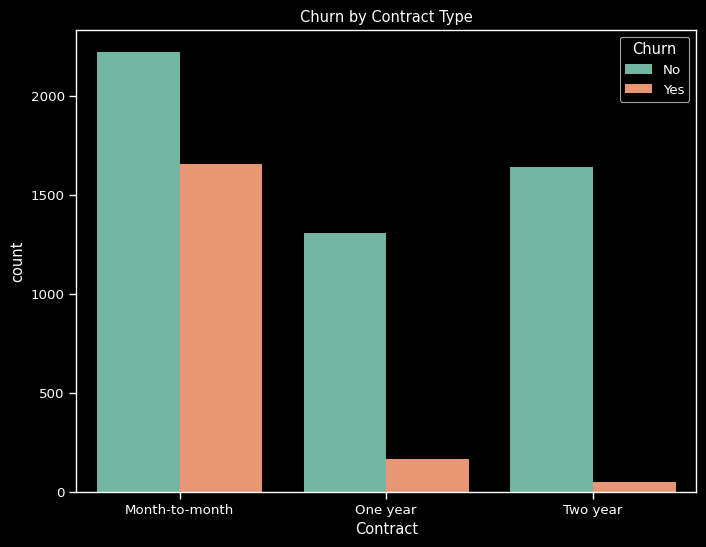

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette="Set2")
plt.title('Churn by Contract Type')
plt.show()

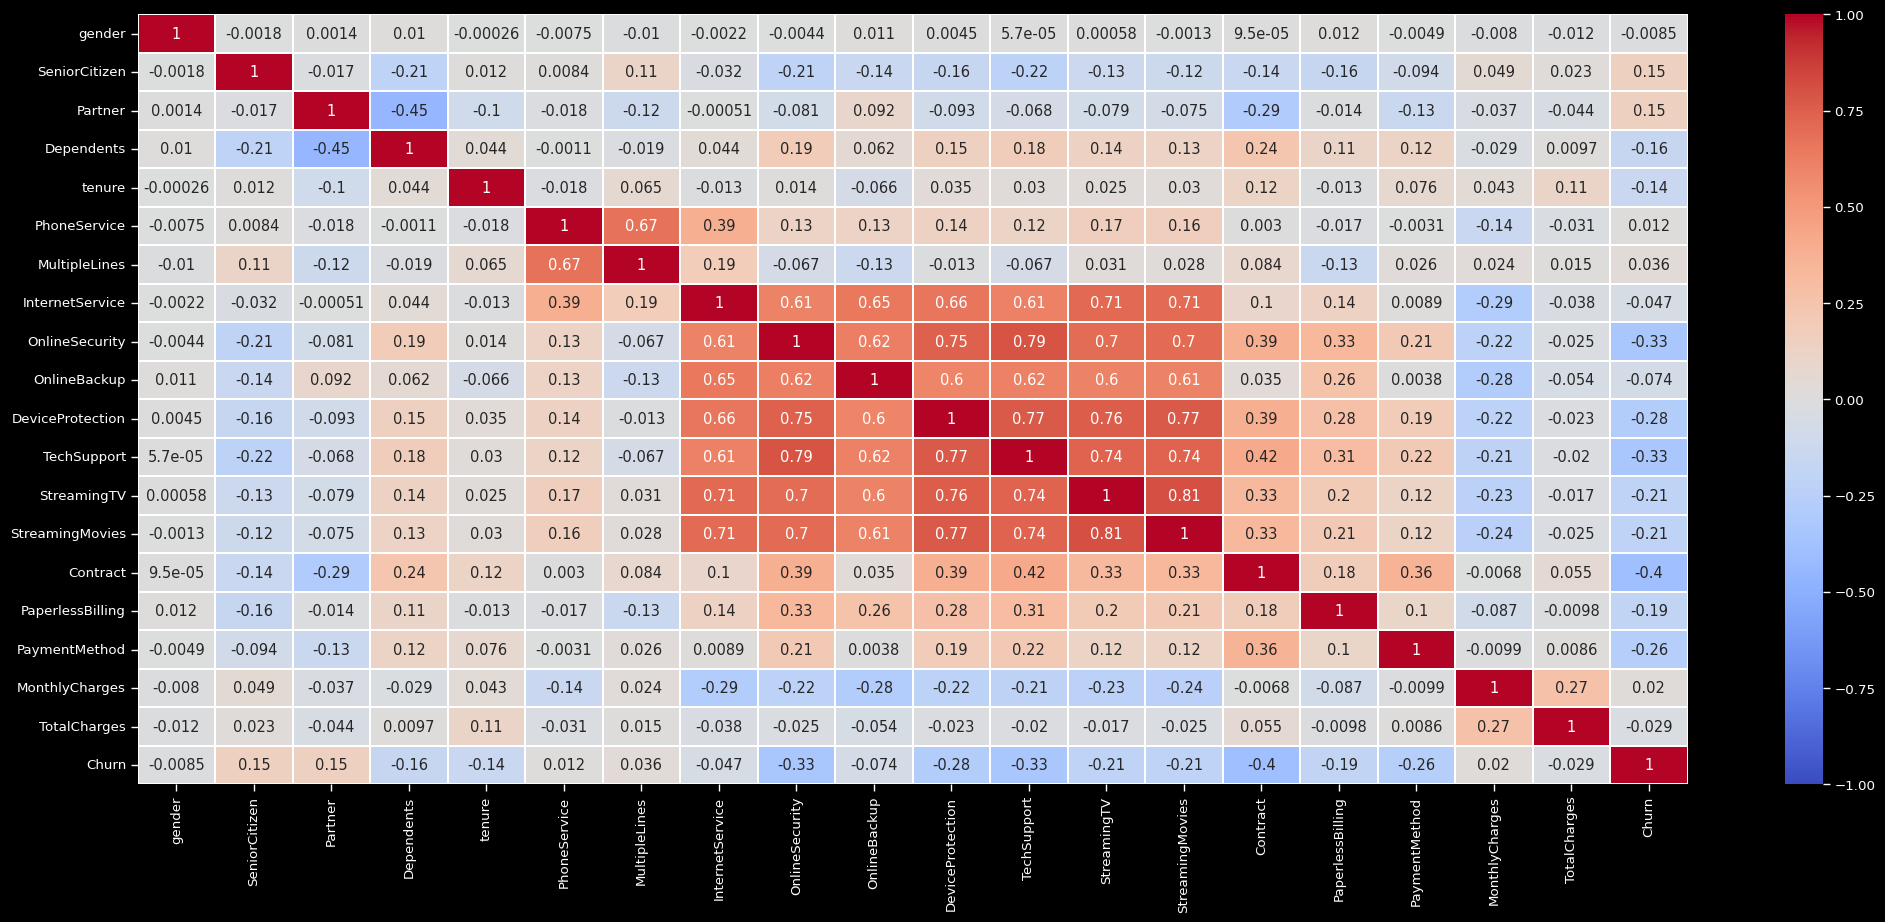

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

**Identifying Outliers**

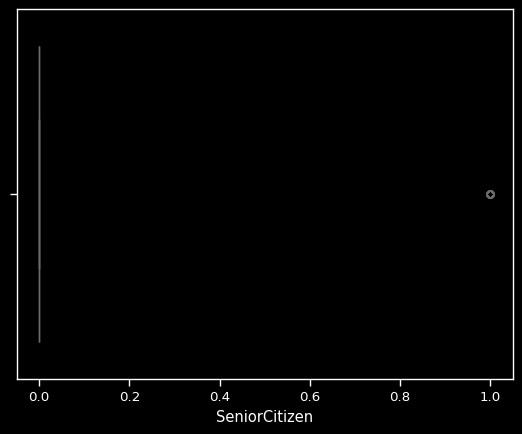

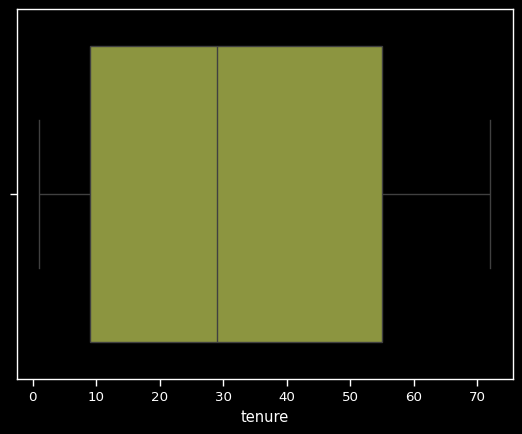

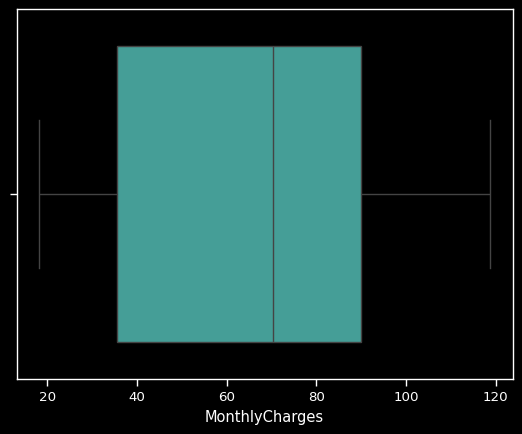

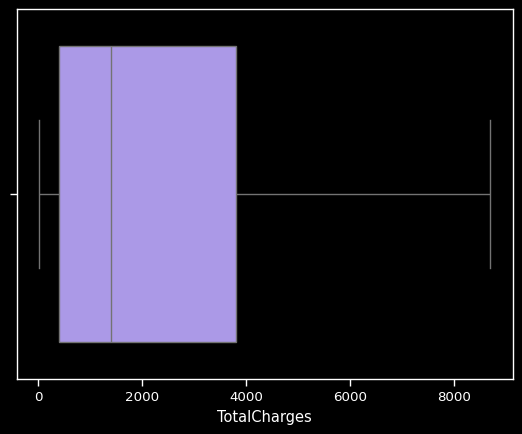

In [ ]:
palette = sns.color_palette("husl", n_colors=len(df.select_dtypes(include="number").columns))

for idx, i in enumerate(df.select_dtypes(include="number").columns):
    sns.boxplot(data=df, x=i, color=palette[idx])
    plt.show()

**There is no Outlier**

**Converting Categorical Data into Numerical Data.**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle
import os

def object_to_int(dataframe):

    os.makedirs('encoders', exist_ok=True)

    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':

            encoder = LabelEncoder()
            dataframe[column] = encoder.fit_transform(dataframe[column])


            with open(f'encoders/{column}_encoder.pkl', 'wb') as f:
                pickle.dump(encoder, f)

    return dataframe


In [ ]:
df = object_to_int(df)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Log Transformation (to handle skewness)**


In [ ]:
df['MonthlyCharges'] = np.log1p(df['MonthlyCharges'])
df['TotalCharges'] = np.log1p(df['TotalCharges'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['tenure'] = scaler.fit_transform(df[['tenure']])

In [ ]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,3.429137,3.429137,0
1,1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,4.059581,7.544597,0
2,1,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,4.004602,4.692723,1
3,1,0,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,3.768153,7.518471,0
4,0,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,4.272491,5.028148,1
5,0,0,0,0,-0.995040,1,2,1,0,0,2,0,2,2,0,1,2,4.611649,6.711132,1
6,1,0,0,1,-0.424625,1,2,1,0,2,0,0,2,0,0,1,1,4.500920,7.575790,0
7,0,0,0,0,-0.913552,0,1,0,2,0,0,0,0,0,0,0,3,3.425890,5.713403,0
8,0,0,1,0,-0.180161,1,2,1,0,0,2,2,2,2,0,1,2,4.661551,8.021929,1
9,1,0,0,1,1.205134,1,0,0,2,2,0,0,0,0,1,0,0,4.045679,8.157356,0


**Define features (X) and target (y)**

In [ ]:
y = df['Churn']
x = df.drop(columns=['Churn'])

In [ ]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,3.429137,3.429137
1,1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,4.059581,7.544597
2,1,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,4.004602,4.692723
3,1,0,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,3.768153,7.518471
4,0,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,4.272491,5.028148


In [ ]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Split the data into training and testing sets (70% train, 30% test)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.70,random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
x = scaler.fit_transform(x)

# **Logistic Regression Model**

In [ ]:
import pandas as pd
import pickle
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, auc, roc_curve

column_names = [f'feature_{i}' for i in range(X_train.shape[1])]
X_train = pd.DataFrame(X_train, columns=column_names)
X_test = pd.DataFrame(X_test, columns=column_names)

def encode_and_save(dataframe, save_path='encoders'):
    os.makedirs(save_path, exist_ok=True)
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            encoder = LabelEncoder()
            dataframe[column] = encoder.fit_transform(dataframe[column])


            with open(f'{save_path}/{column}_encoder.pkl', 'wb') as f:
                pickle.dump(encoder, f)
    return dataframe

X_train = encode_and_save(X_train)
X_test = encode_and_save(X_test)

log_model = LogisticRegression(solver="liblinear", random_state=1)
log_model.fit(X_train, y_train)

with open("model.pkl", "wb") as file:
    pickle.dump(log_model, file)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

print("Logistic Regression MODEL")
print("Training Score:", log_model.score(X_train, y_train))
print("Test Score:", log_model.score(X_test, y_test))
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_log)


Logistic Regression MODEL
Training Score: 0.8084112149532711
Test Score: 0.8
Accuracy: 0.8
ROC-AUC: 0.8392212099347633


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.66      0.51      0.57       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



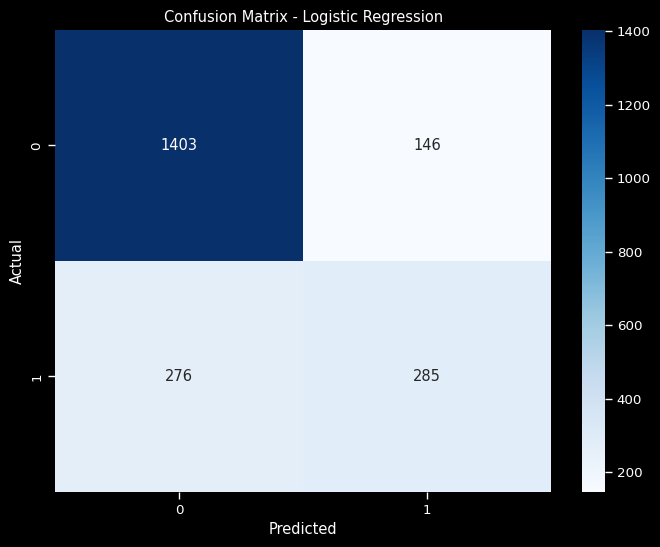

In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred_log))
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr_log, y=tpr_log,
    mode='lines',
    line=dict(color='orange', width=2),
    name=f'ROC Curve (AUC = {roc_auc_log:.2f})'
))
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='White', width=2, dash='dash'),
    name='Random'
))
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve -Without PCA',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_dark'
)
fig.show()

# **Descision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

print("Decision Tree MODEL")

train_score= tree_model.score(X_train, y_train)
print("Training Score:", train_score)

test_score = tree_model.score(X_test, y_test)
print("Test Score:", test_score)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_tree))

Decision Tree MODEL
Training Score: 0.9985778138967899
Test Score: 0.7184834123222749
Accuracy: 0.7184834123222749
ROC-AUC: 0.6461474195875897


Evaluation

classification report
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1549
           1       0.47      0.49      0.48       561

    accuracy                           0.72      2110
   macro avg       0.64      0.65      0.64      2110
weighted avg       0.72      0.72      0.72      2110



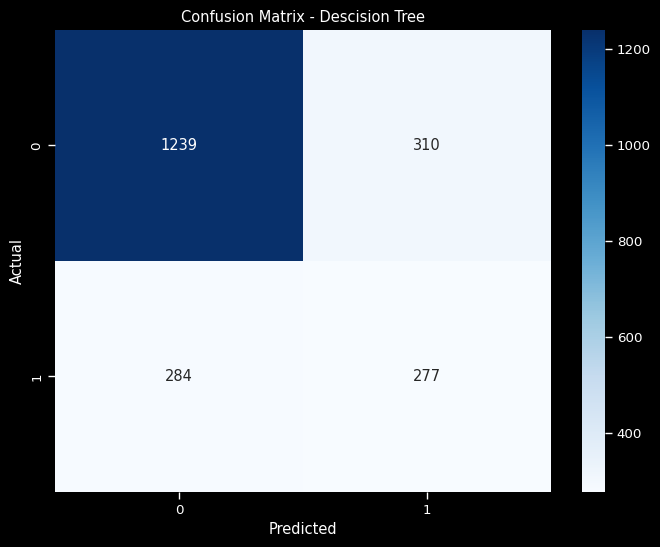

In [ ]:
print("classification report")
print(classification_report(y_test, y_pred_tree))
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Descision Tree')
plt.show()

**ROC Curve Visualisation**




In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr_tree, y=tpr_tree,
    mode='lines',
    line=dict(color='green', width=2),
    name=f'ROC Curve (AUC = {roc_auc_tree:.2f})'
))
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='White', width=2, dash='dash'),
    name='Random'
))
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve - Without PCA',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_dark'
)
fig.show()

# **SVM Model**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

ROC Curve

In [ ]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

Support Vector Machine MODEL
Training Score: 0.8307598537180008
Test Score: 0.7971563981042654
Accuracy: 0.7971563981042654
ROC-AUC: 0.7963455233610552
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.67      0.46      0.55       561

    accuracy                           0.80      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.78      0.80      0.78      2110



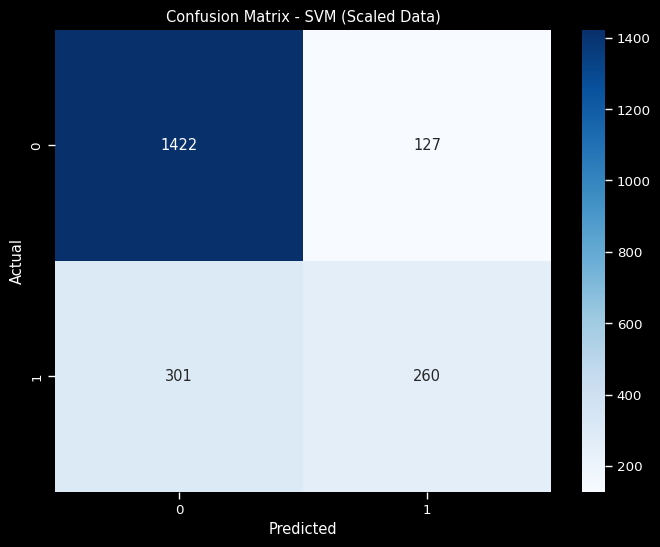

In [ ]:
print("Support Vector Machine MODEL")

train_score= svm_model.score(X_train, y_train)
print("Training Score:", train_score)

test_score = svm_model.score(X_test, y_test)
print("Test Score:", test_score)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_svm))
print("Classification Report")
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM (Scaled Data)')
plt.show()

ROC Curve Visualisation

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=fpr_svm, y=tpr_svm,
    mode='lines',
    line=dict(color='purple', width=2),
    name=f'ROC Curve (AUC = {roc_auc_svm:.2f})'
))
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='White', width=2, dash='dash'),
    name='Random'
))
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve - Without PCA',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_dark'
)
fig.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [ ]:
svm_model_lda = SVC(probability=True)
svm_model_lda.fit(X_train_lda, y_train)
y_pred_svm = svm_model_lda.predict(X_test_lda)
y_prob_svm = svm_model_lda.predict_proba(X_test_lda)[:, 1]

In [ ]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [ ]:
print("Support Vector Machine MODEL (LDA Transformed Data)")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_svm))
print("Classification Report")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine MODEL (LDA Transformed Data)
Accuracy: 0.7971563981042654
ROC-AUC: 0.7821077136764678
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.48      0.56       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.71      2110
weighted avg       0.78      0.80      0.79      2110



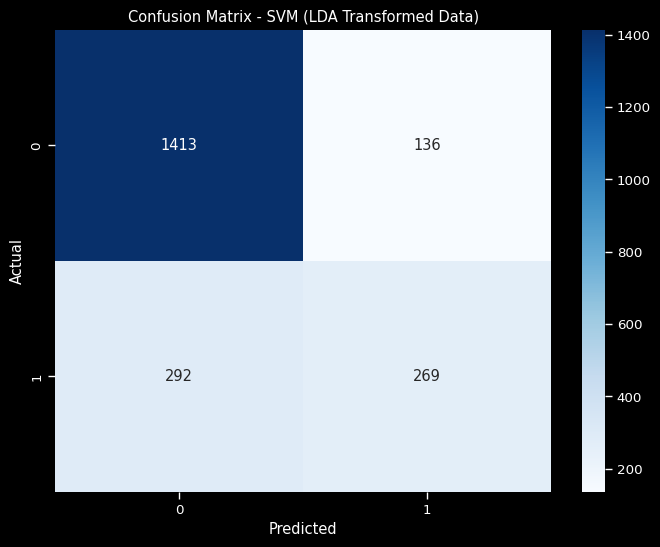

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM (LDA Transformed Data)')
plt.show()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=fpr_svm, y=tpr_svm,
    mode='lines',
    line=dict(color='purple', width=2),
    name=f'ROC Curve (AUC = {roc_auc_svm:.2f})'
))
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='White', width=2, dash='dash'),
    name='Random'
))
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve - LDA Transformed Data',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_dark'
)
fig.show()

**T-SNE on SVM**

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=3, random_state=1)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

In [ ]:
svm_model_tsne = SVC(probability=True, random_state=1)
svm_model_tsne.fit(X_train_tsne, y_train)
y_pred_svm = svm_model_tsne.predict(X_test_tsne)
y_prob_svm = svm_model_tsne.predict_proba(X_test_tsne)[:, 1]

In [ ]:
print("SVM MODEL (t-SNE Transformed Data)")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report")
print(classification_report(y_test, y_pred_svm))

SVM MODEL (t-SNE Transformed Data)
Accuracy: 0.6739336492890995
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      1549
           1       0.22      0.09      0.13       561

    accuracy                           0.67      2110
   macro avg       0.48      0.49      0.46      2110
weighted avg       0.59      0.67      0.62      2110



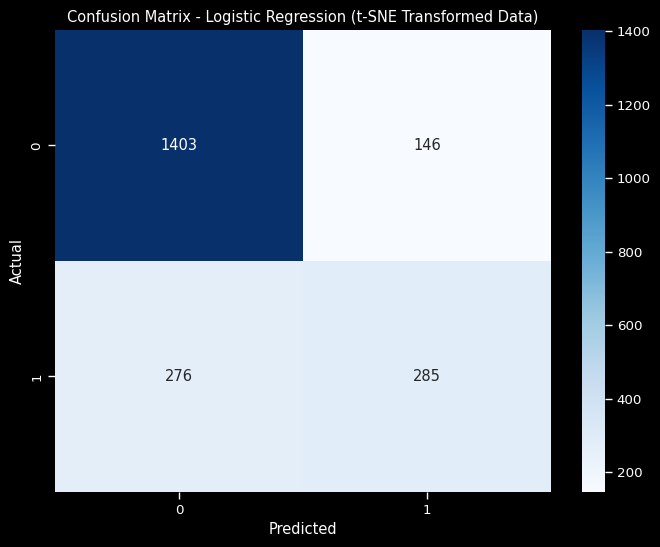

In [ ]:
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression (t-SNE Transformed Data)')
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
print("Random Forest Classifier MODEL (Scaled Data)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier MODEL (Scaled Data)
Accuracy: 0.7805687203791469
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1549
           1       0.61      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110



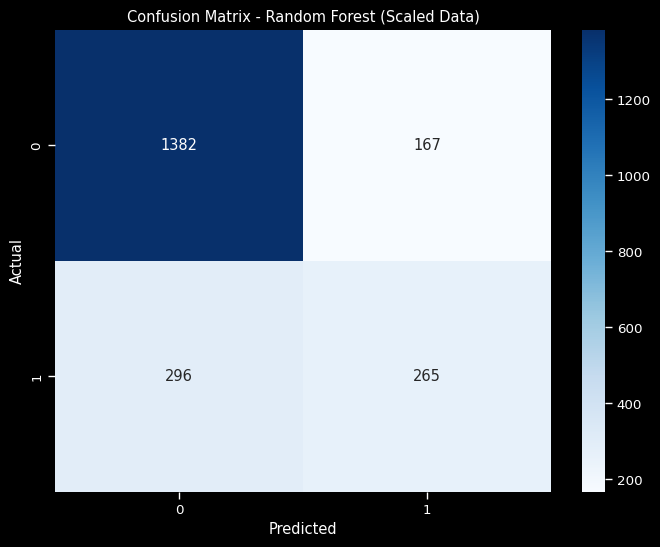

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest (Scaled Data)')
plt.show()

**Random Forest Classifier on LDA reduced Data**

In [ ]:
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

rf_model_lda = RandomForestClassifier(random_state=1)
rf_model_lda.fit(X_train_lda, y_train)
y_pred_rf = rf_model_lda.predict(X_test_lda)
y_prob_rf = rf_model_lda.predict_proba(X_test_lda)[:, 1]

In [ ]:
print("Random Forest Classifier MODEL (LDA Transformed Data)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier MODEL (LDA Transformed Data)
Accuracy: 0.7255924170616114
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1549
           1       0.48      0.49      0.49       561

    accuracy                           0.73      2110
   macro avg       0.65      0.65      0.65      2110
weighted avg       0.73      0.73      0.73      2110



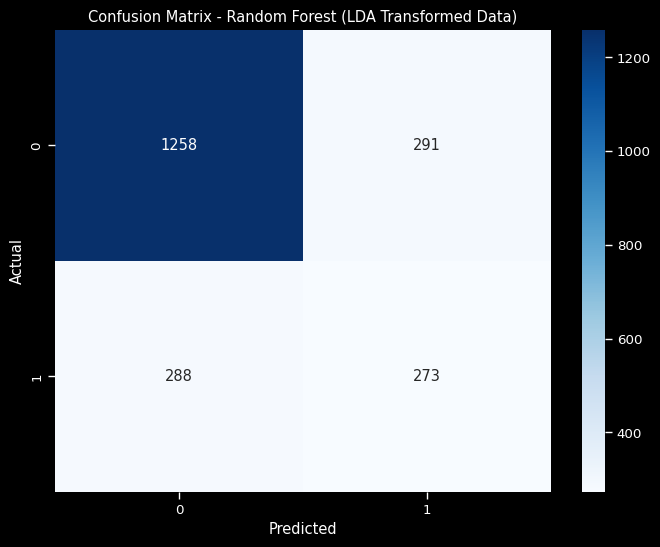

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest (LDA Transformed Data)')
plt.show()

# Analysing PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
X_pca = pca.fit_transform(x)

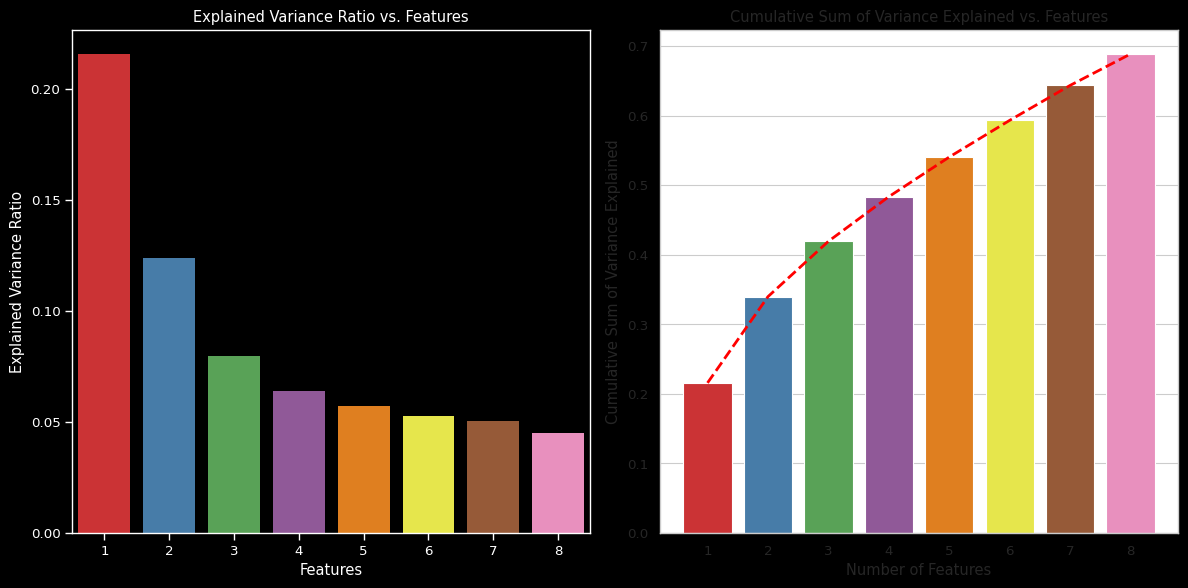

In [ ]:
import seaborn as sns

eigenvalues = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(eigenvalues)

comps = np.arange(0, len(eigenvalues), 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=comps+1, y=eigenvalues, hue=comps+1, palette='Set1', dodge=False, legend=False)
sns.set_style('whitegrid')
plt.title('Explained Variance Ratio vs. Features')
plt.xlabel('Features')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1, 2, 2)
sns.barplot(x=comps+1, y=cum_sum_eigenvalues, hue=comps+1, palette='Set1', dodge=False, legend=False)
plt.plot(comps, cum_sum_eigenvalues, 'r--', linewidth=2)
plt.title('Cumulative Sum of Variance Explained vs. Features')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Sum of Variance Explained')
template='plotly_dark'
plt.tight_layout()
plt.show()

In [ ]:
pca = PCA(n_components = 12)
X_pca = pca.fit_transform(x)

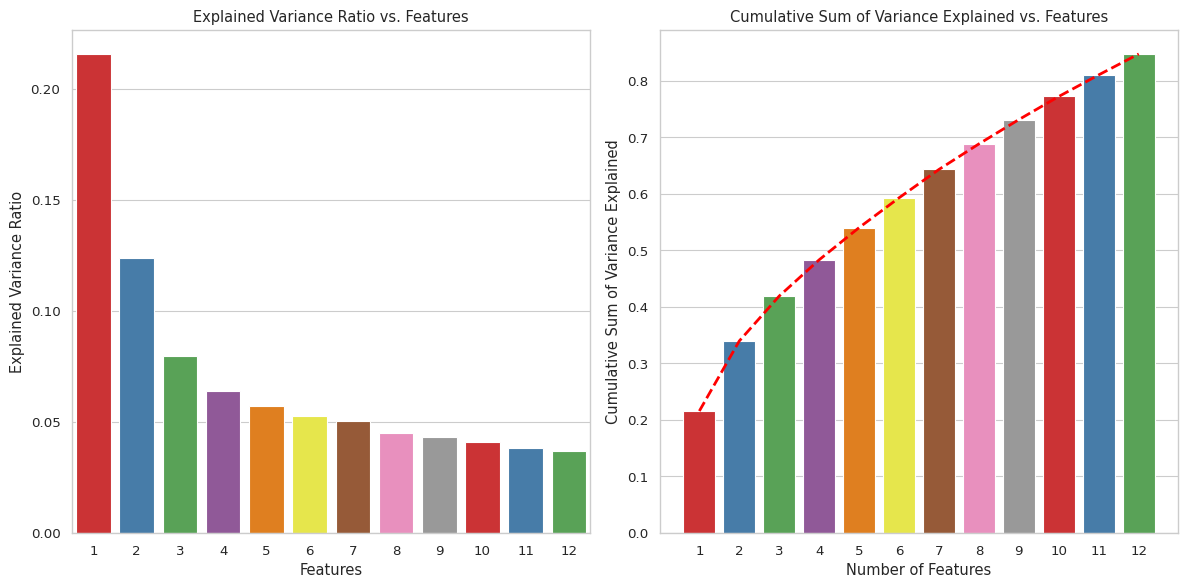

In [ ]:
eigenvalues = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(eigenvalues)

comps = np.arange(0, len(eigenvalues), 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=comps+1, y=eigenvalues, hue=comps+1, palette='Set1', dodge=False, legend=False)
sns.set_style('whitegrid')
plt.title('Explained Variance Ratio vs. Features')
plt.xlabel('Features')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1, 2, 2)
sns.barplot(x=comps+1, y=cum_sum_eigenvalues, hue=comps+1, palette='Set1', dodge=False, legend=False)
plt.plot(comps, cum_sum_eigenvalues, 'r--', linewidth=2)
plt.title('Cumulative Sum of Variance Explained vs. Features')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Sum of Variance Explained')

plt.tight_layout()
plt.show()

# **Logistic regression on PCA-reduced data**

Applying PCA

In [ ]:
from sklearn.decomposition import PCA
n_components = 12
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Logistic Regression on PCA reduced data**

In [ ]:
log_model_pca = LogisticRegression(solver="liblinear", random_state=1)
log_model_pca.fit(X_train_pca, y_train)
y_pred_log = log_model_pca.predict(X_test_pca)
y_prob_log = log_model_pca.predict_proba(X_test_pca)[:, 1]


ROC Curve

In [ ]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

Logistic Regression MODEL
Accuracy: 0.7824644549763033
ROC-AUC: 0.8261117229332017
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1549
           1       0.61      0.51      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.71      2110
weighted avg       0.77      0.78      0.78      2110



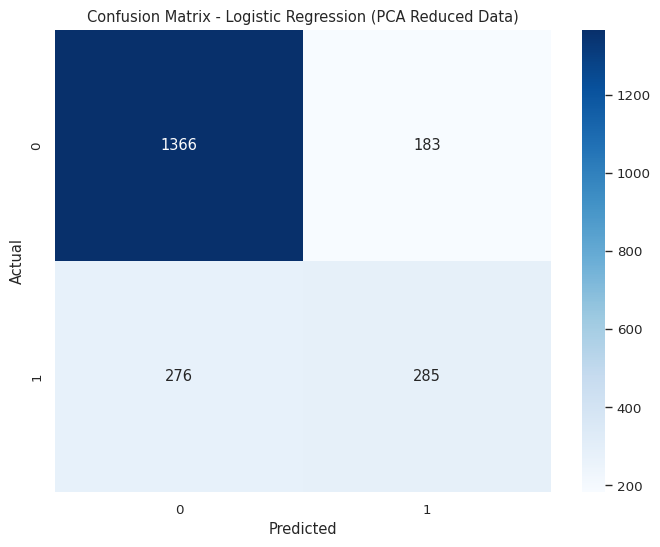

In [ ]:
print("Logistic Regression MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))
print("Classification Report")
print(classification_report(y_test, y_pred_log))

cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression (PCA Reduced Data)')
plt.show()


**ROC Curve Visualisation**

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=fpr_log, y=tpr_log,
    mode='lines',
    line=dict(color='orange', width=2),
    name=f'ROC Curve (AUC = {roc_auc_log:.2f})'
))
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='White', width=2, dash='dash'),
    name='Random'
))
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve - PCA Reduced Data',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_dark'
)
fig.show()

# KNN Classifier

# **Decision Tree Classifier on PCA reduced data**

In [ ]:
tree_model_pca = DecisionTreeClassifier()
tree_model_pca.fit(X_train_pca, y_train)
y_pred_tree = tree_model_pca.predict(X_test_pca)
y_prob_tree = tree_model_pca.predict_proba(X_test_pca)[:, 1]

ROC curve

In [ ]:
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

Decision Tree MODEL
Accuracy: 0.718957345971564
ROC-AUC: 0.6365650198103774
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1549
           1       0.47      0.46      0.47       561

    accuracy                           0.72      2110
   macro avg       0.64      0.64      0.64      2110
weighted avg       0.72      0.72      0.72      2110



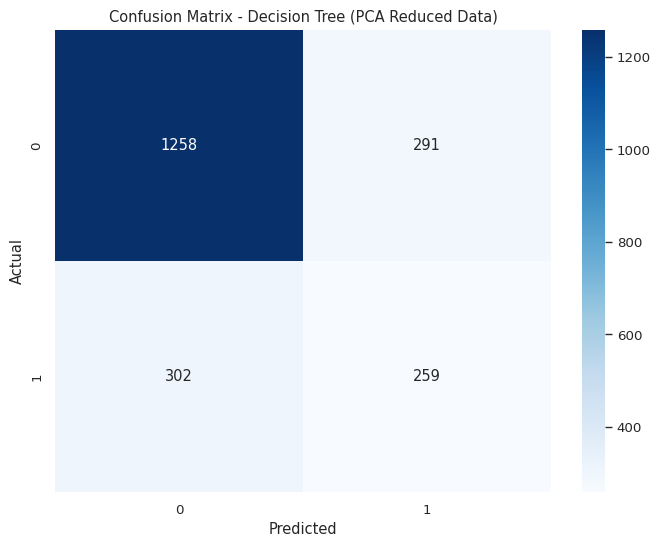

In [ ]:
print("Decision Tree MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_tree))
print("Classification Report")
print(classification_report(y_test, y_pred_tree))

cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Decision Tree (PCA Reduced Data)')
plt.show()


ROC Curve Visualization

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=fpr_tree, y=tpr_tree,
    mode='lines',
    line=dict(color='green', width=2),
    name=f'ROC Curve (AUC = {roc_auc_tree:.2f})'
))
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='White', width=2, dash='dash'),
    name='Random'
))
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve - PCA Reduced Data',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_dark'
)
fig.show()

# **Support Vector Machine (SVM) classification on PCA-reduced**

In [ ]:
svm_model_pca = SVC(probability=True)
svm_model_pca.fit(X_train_pca, y_train)
y_pred_svm = svm_model_pca.predict(X_test_pca)
y_prob_svm = svm_model_pca.predict_proba(X_test_pca)[:, 1]

ROC Curve

In [ ]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

Support Vector Machine MODEL
Accuracy: 0.7919431279620853
ROC-AUC: 0.7917649130196125
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1549
           1       0.65      0.47      0.55       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



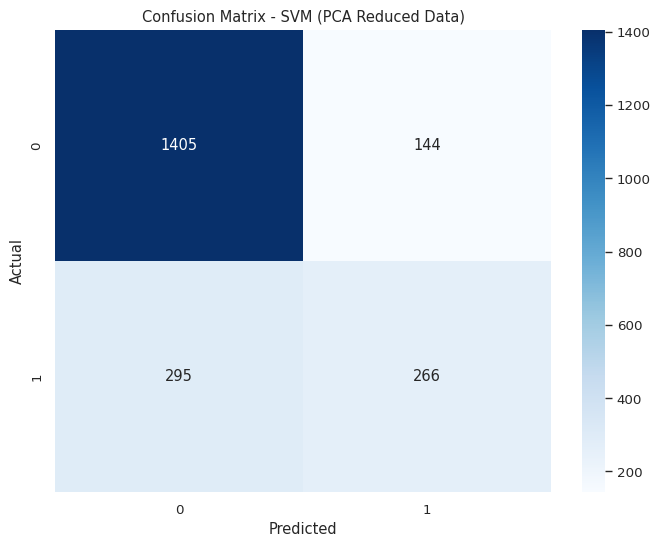

In [ ]:

print("Support Vector Machine MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_svm))
print("Classification Report")
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM (PCA Reduced Data)')
plt.show()

**ROC Curve Visualization**

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=fpr_svm, y=tpr_svm,
    mode='lines',
    line=dict(color='purple', width=2),
    name=f'ROC Curve (AUC = {roc_auc_svm:.2f})'
))
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='White', width=2, dash='dash'),
    name='Random'
))
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve - PCA Reduced Data',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_dark'
)
fig.show()

# KNN




In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn_scaled = knn_model.predict(X_test)
y_prob_knn_scaled = knn_model.predict_proba(X_test)[:, 1]

In [ ]:
fpr_knn_scaled, tpr_knn_scaled, _ = roc_curve(y_test, y_prob_knn_scaled)
roc_auc_knn_scaled = auc(fpr_knn_scaled, tpr_knn_scaled)

print("Accuracy (Scaled Data):", accuracy_score(y_test, y_pred_knn_scaled))
print("ROC-AUC (Scaled Data):", roc_auc_knn_scaled)
print("Classification Report (Scaled Data)")
print(classification_report(y_test, y_pred_knn_scaled))

Accuracy (Scaled Data): 0.7440758293838863
ROC-AUC (Scaled Data): 0.7546280792967459
Classification Report (Scaled Data)
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1549
           1       0.52      0.47      0.49       561

    accuracy                           0.74      2110
   macro avg       0.67      0.66      0.66      2110
weighted avg       0.74      0.74      0.74      2110



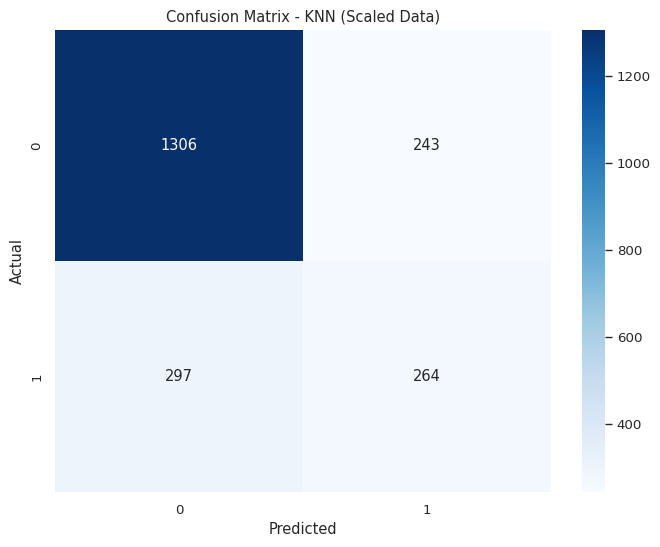

In [ ]:
cm_scaled = confusion_matrix(y_test, y_pred_knn_scaled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_scaled, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - KNN (Scaled Data)')
plt.show()

ROC curve visualization

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=fpr_knn_scaled, y=tpr_knn_scaled,
    mode='lines',
    line=dict(color='blue', width=2),
    name=f'ROC Curve (AUC = {roc_auc_knn_scaled:.2f})'
))
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(color='White', width=2, dash='dash'),
    name='Random'
))
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve - KNN (Scaled Data)',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_dark'
)
fig.show()

**KNN on LDA Reduced Data**

In [ ]:
knn_model_pca = KNeighborsClassifier(n_neighbors=5)
knn_model_pca.fit(X_train_lda, y_train)
y_pred_knn = knn_model_pca.predict(X_test_lda)
y_prob_knn = knn_model_pca.predict_proba(X_test_lda)[:, 1]

In [ ]:
print("K-Nearest Neighbors MODEL (LDA Transformed Data)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors MODEL (LDA Transformed Data)
Accuracy: 0.771090047393365
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1549
           1       0.58      0.52      0.55       561

    accuracy                           0.77      2110
   macro avg       0.70      0.69      0.70      2110
weighted avg       0.76      0.77      0.77      2110



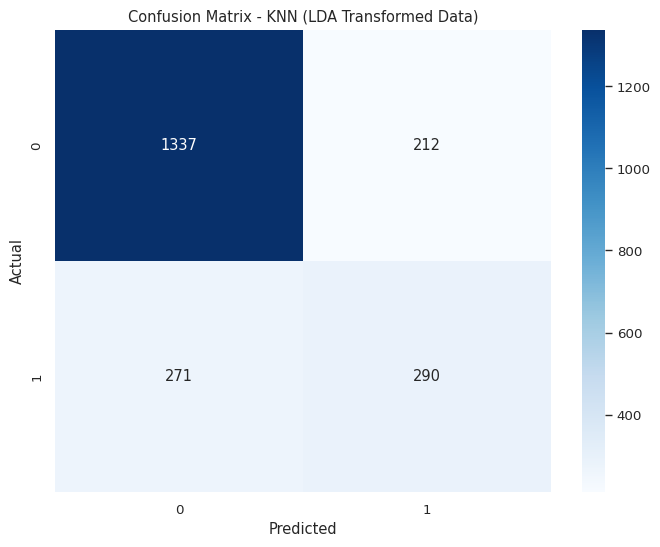

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - KNN (LDA Transformed Data)')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
num_classes = len(np.unique(y))
y_categorical = to_categorical(y, num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.3, random_state=42)

In [ ]:
def create_mlp_model(activation):
    model = Sequential()
    model.add(Dense(64, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation=activation))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Training MLP with relu activation


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Activation Function: relu
Accuracy: 0.7834123222748816
AUC Score: 0.814983273666295
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.61      0.50      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.78      2110



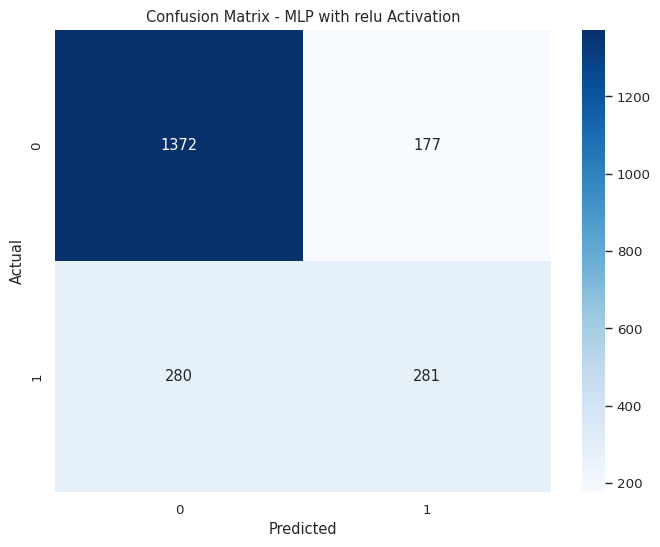

Training MLP with linear activation


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Activation Function: linear
Accuracy: 0.8004739336492891
AUC Score: 0.8362018966868395
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.66      0.51      0.57       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



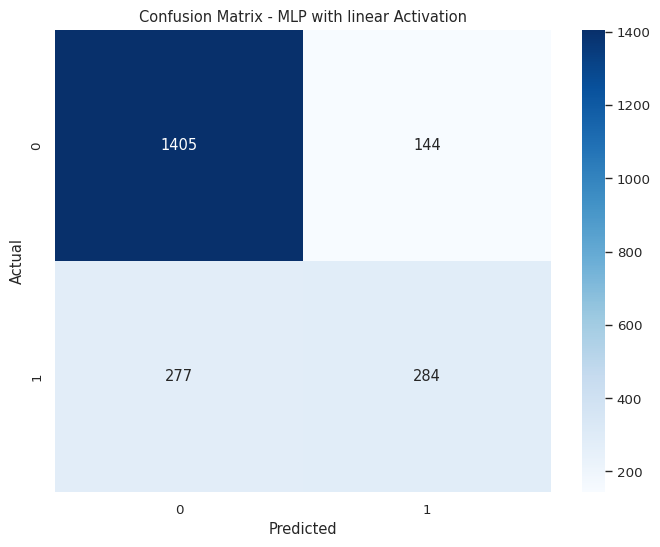

Training MLP with sigmoid activation


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Activation Function: sigmoid
Accuracy: 0.7985781990521327
AUC Score: 0.8390923245288491
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



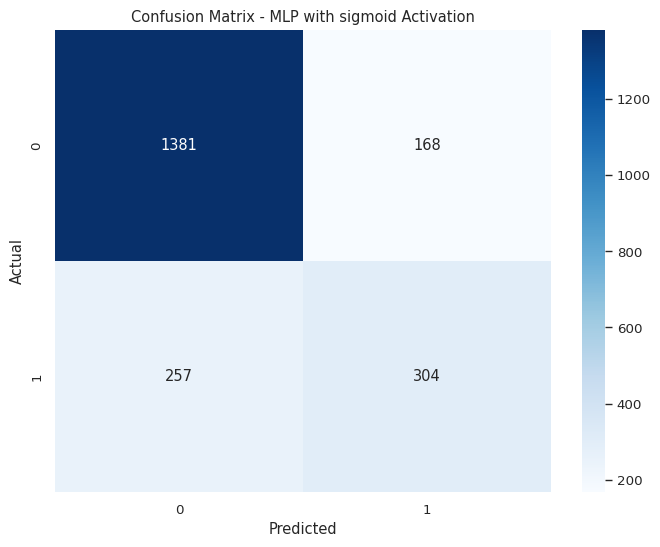

In [ ]:
results = {}
activations = ['relu', 'linear', 'sigmoid']

for activation in activations:
    print(f"Training MLP with {activation} activation")
    model = create_mlp_model(activation)
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_split=0.1)

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_true, y_pred_classes)
    auc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')
    results[activation] = {'accuracy': accuracy, 'AUC': auc_score}

    print(f"\nActivation Function: {activation}")
    print(f"Accuracy: {accuracy}")
    print(f"AUC Score: {auc_score}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred_classes))

    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix - MLP with {activation} Activation')
    plt.show()


In [ ]:
results_df = pd.DataFrame(results).T
print("\nComparison of MLP Models with Different Activation Functions:")
print(results_df)


Comparison of MLP Models with Different Activation Functions:
         accuracy       AUC
relu     0.783412  0.814983
linear   0.800474  0.836202
sigmoid  0.798578  0.839092


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score

if y_test.ndim > 1:
    y_test_single = np.argmax(y_test, axis=1)
else:
    y_test_single = y_test

if y_pred.ndim > 1:
    y_pred_single = np.argmax(y_pred, axis=1)
else:
    y_pred_single = y_pred


In [ ]:
if y_test.ndim > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

if y_pred.ndim > 1:
    y_pred_classes = np.argmax(y_pred, axis=1)
else:
    y_pred_classes = y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential mo

Training MLP with relu activation
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training MLP with linear activation


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training MLP with sigmoid activation


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
                 Model  Accuracy  F1 Score    Recall
0  Logistic Regression  0.798578  0.788836  0.798578
1                  SVM  0.797630  0.784342  0.797630
2                  KNN  0.744550  0.740366  0.744550
3        Decision Tree  0.720853  0.723051  0.720853
4        Random Forest  0.782464  0.773226  0.782464
5           MLP - relu  0.787678  0.782809  0.787678
6         MLP - linear  0.795735  0.790241  0.795735
7        MLP - sigmoid  0.798578  0.781022  0.798578


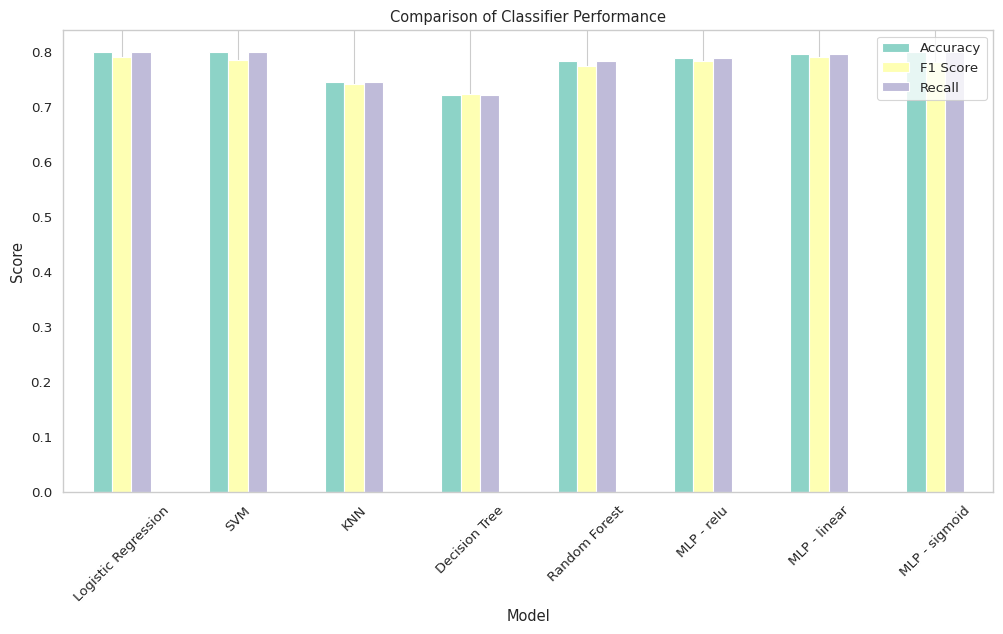

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score

metrics = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': [],
    'Recall': []
}

models = {
    'Logistic Regression': log_model,
    'SVM': svm_model,
    'KNN': knn_model,
    'Decision Tree': tree_model,
    'Random Forest': rf_model
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)

    y_true = y_test if y_test.ndim == 1 else np.argmax(y_test, axis=1)

    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy_score(y_true, y_pred))
    metrics['F1 Score'].append(f1_score(y_true, y_pred, average='weighted'))
    metrics['Recall'].append(recall_score(y_true, y_pred, average='weighted'))

results = {}
activations = ['relu', 'linear', 'sigmoid']

for activation in activations:
    print(f"Training MLP with {activation} activation")

    model = create_mlp_model(activation)
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_split=0.1)

    y_pred = model.predict(X_test)

    y_pred_classes = np.argmax(y_pred, axis=1) if y_pred.ndim > 1 else y_pred

    y_true = y_test if y_test.ndim == 1 else np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_true, y_pred_classes)
    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')

    metrics['Model'].append(f'MLP - {activation}')
    metrics['Accuracy'].append(accuracy)
    metrics['F1 Score'].append(f1)
    metrics['Recall'].append(recall)

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Classifier Performance')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
